# Data Visualization Project
For this assignment, recreate this plot from [The Economist](https://www.economist.com/graphic-detail/2011/12/02/corrosive-corruption):

<img src="https://i0.wp.com/flowingdata.com/wp-content/uploads/2011/12/Corruption-vs-human-development.gif?fit=595%2C404&ssl=1">

Feel free to work throughas little or as much as you want. We haven't covered everything that you will need to reproduce this plot, but we have covered the skills needed for you to find and learn what you need from the documentation. Best of luck and have fun!

## What to do
This assignment will be very challenging! You will recreate this plot by following the steps outlined in bold below. You will need to reference documentation! There are things in this plot that we have purposefully not covered to test your skills in going to the documentation and referencing what you need to know. Links and hints will be provided to along the way!
## Let's get started!

__Import the ggplot2 data.table libraries and use read.csv() to load the csv file 'Economist_Assignment_Data.csv' into a dataframe called data__

In [1]:
# Load the required libraries
library(ggplot2)
library(data.table)
library(ggthemes)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"

In [2]:
# Import the Data
data <- read.csv("Economist_Assignment_Data.csv", header = TRUE)

In [3]:
head(data)

,X,Country,HDI.Rank,HDI,CPI,Region
,<int>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,1,Afghanistan,172,0.398,1.5,Asia Pacific
2,2,Albania,70,0.739,3.1,East EU Cemt Asia
3,3,Algeria,96,0.698,2.9,MENA
4,4,Angola,148,0.486,2.0,SSA
5,5,Argentina,45,0.797,3.0,Americas
6,6,Armenia,86,0.716,2.6,East EU Cemt Asia


Use __ggplot()__ + __geom_point()__ to create a scatter plot object called pl. You will need to specify __x = CPI__ and __y = HDI__ and __color = Region__ as aesthetics

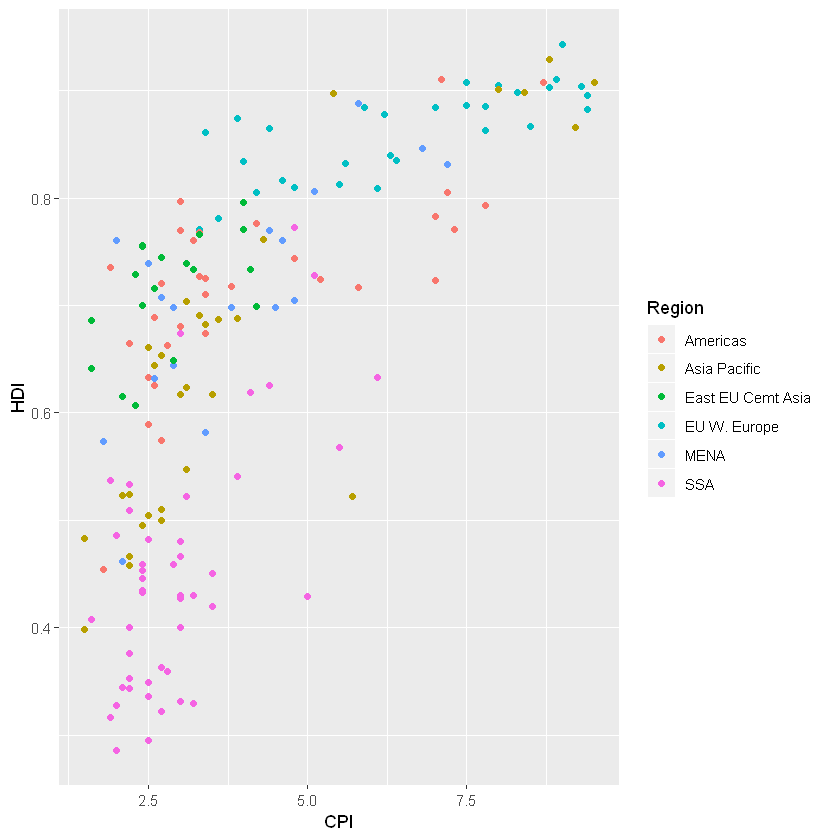

In [4]:
pl <- ggplot(data,aes(x=CPI,y=HDI,color=Region)) + geom_point()
pl 

Change the points to be larger empty circles. (You'll have to go back and add arguments to __geom_point()__ and reassign it to pl.) You'll need to figure out what __shape =__ and __size =__ and __stroke = __. [Shape reference](http://www.sthda.com/english/wiki/ggplot2-point-shapes) 

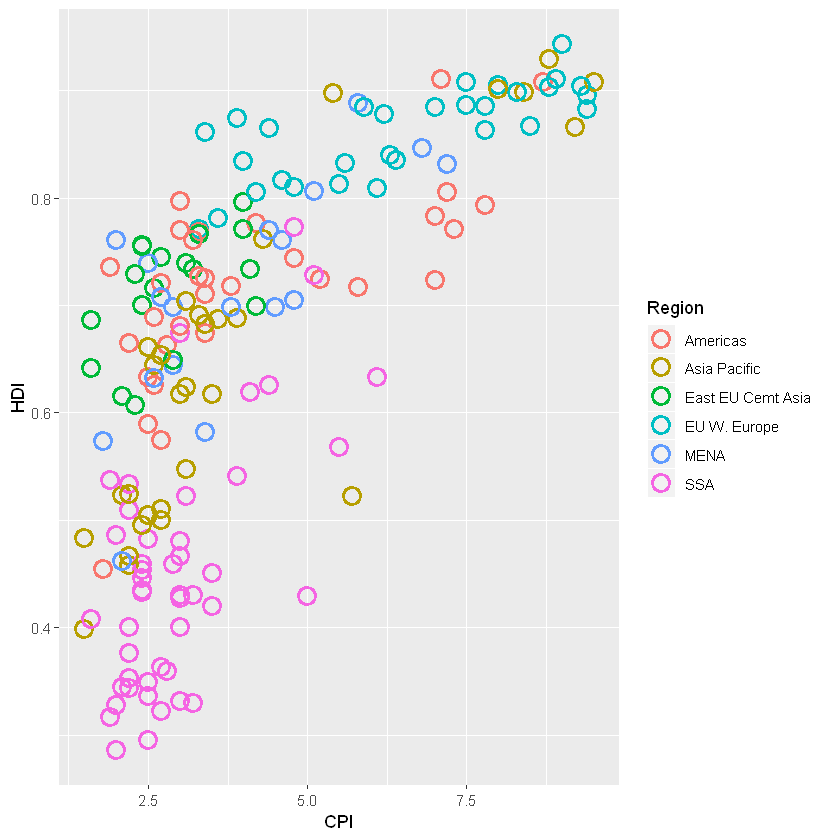

In [5]:
pl <- ggplot(data,aes(x=CPI,y=HDI,color=Region)) + geom_point(size = 4,shape = 1, stroke = 1.5)
pl

Add [__geom_smooth(aes(group=1))__](https://ggplot2.tidyverse.org/reference/geom_smooth.html) to add a trend line

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


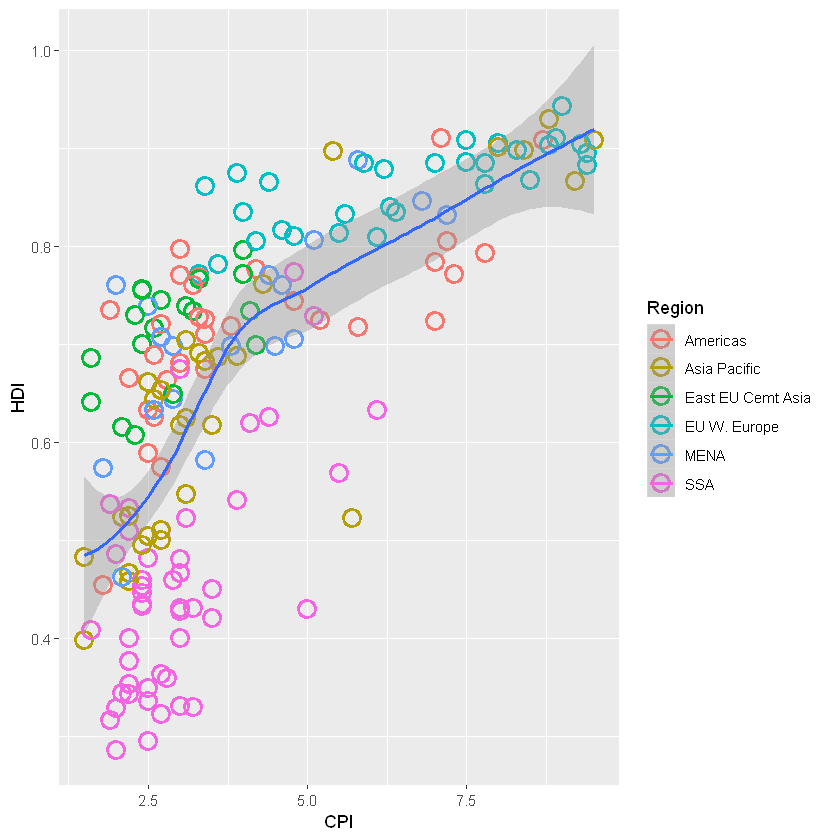

In [6]:
pl + geom_smooth(aes(group=1))

We want to further edit this trend line. Add the following arguments to geom_smooth (outside of aes):

- method = 'lm'
- formula = y ~ log(x)
- se = FALSE
- color = 'red'

For more info on these arguments, check out the [documentation](http://docs.ggplot2.org/current/geom_smooth.html) under the Arguments list for details.

Assign all of this to pl2

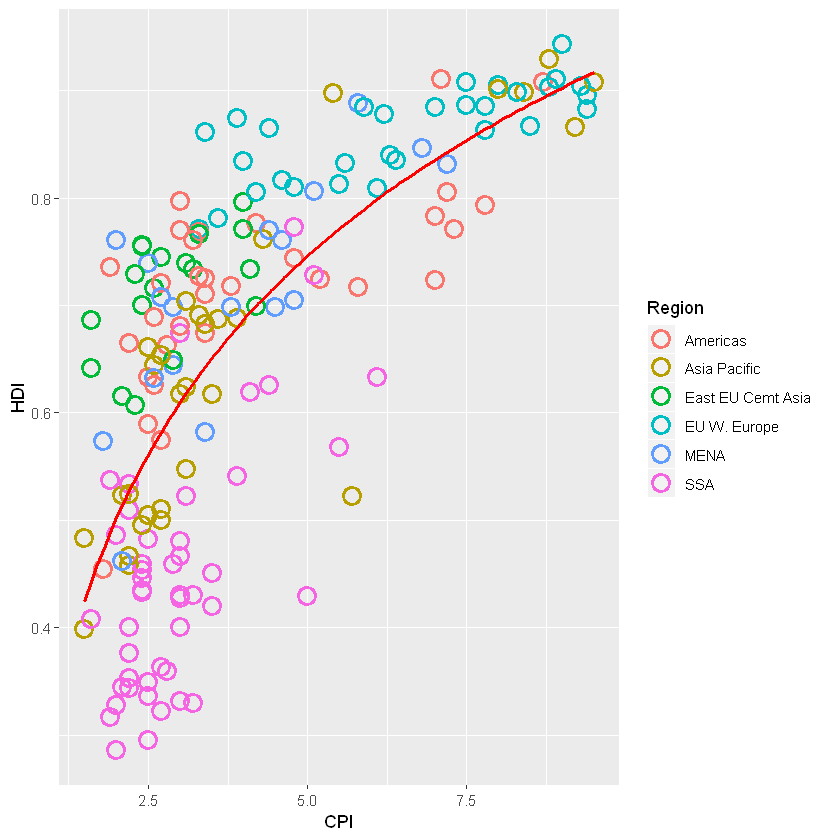

In [7]:
pl2 <- pl + geom_smooth(aes(group=1),method ='lm',formula = y~log(x),se=FALSE,color='red')
pl2

It's really starting to look similar! But we still need to add labels, we can use geom_text! Add geom_text(aes(label=Country)) to pl2 and see what happens. (Hint: It should be way too many labels)

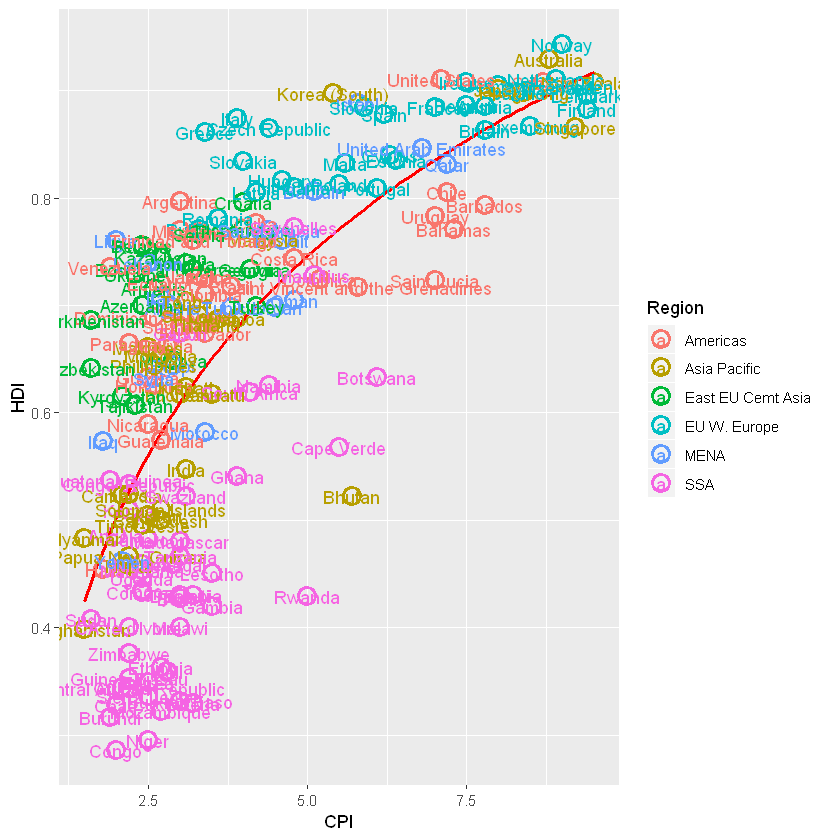

In [8]:
pl2 + geom_text(aes(label=Country))

Labeling a subset is actually pretty tricky! So I'll just going to give you the answer since it would require manually selecting the subset of countries we want to label!

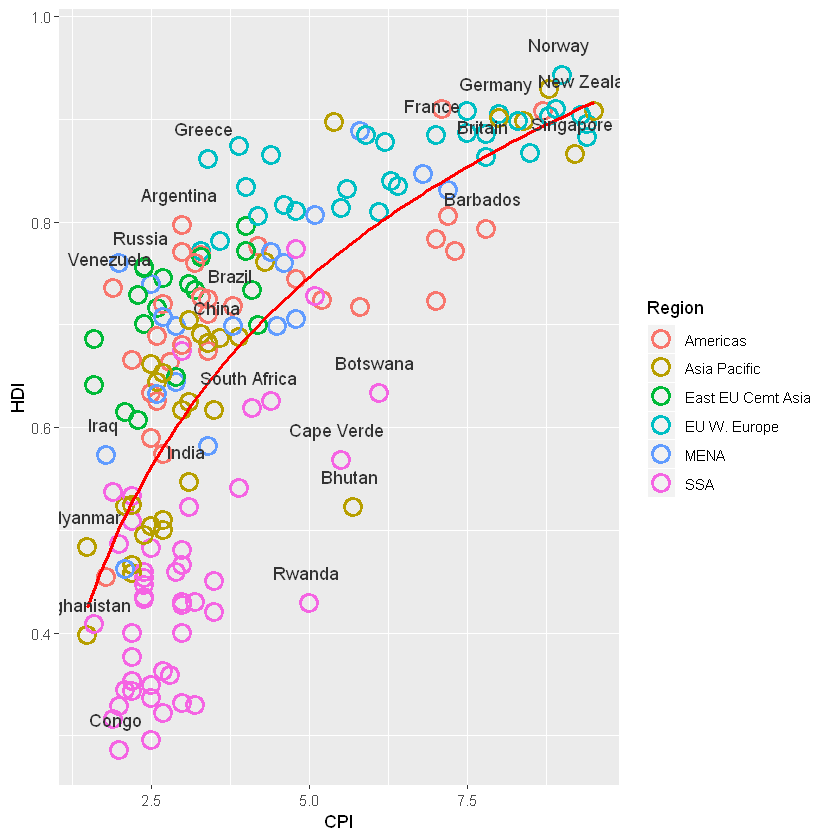

In [9]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

pl3 <- pl2 + geom_text(aes(label = Country),
                       nudge_x = -0.05,
                       nudge_y = 0.03,
                       color = "gray20", 
                data = subset(data, Country %in% pointsToLabel),check_overlap = TRUE)

pl3

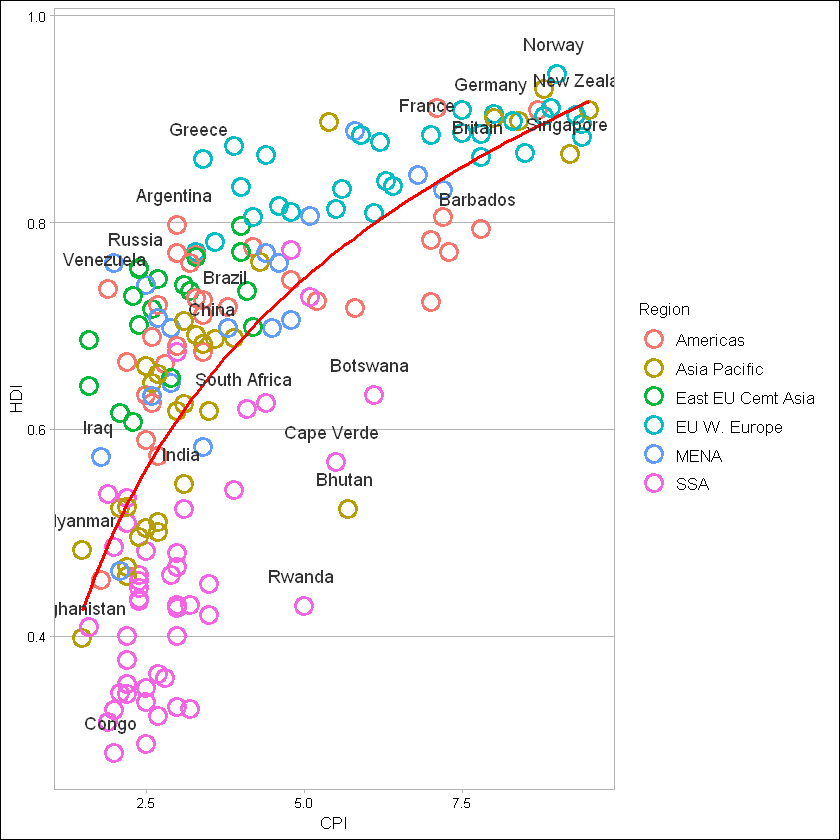

In [10]:
pl4 <- pl3 + theme_calc() 
pl4

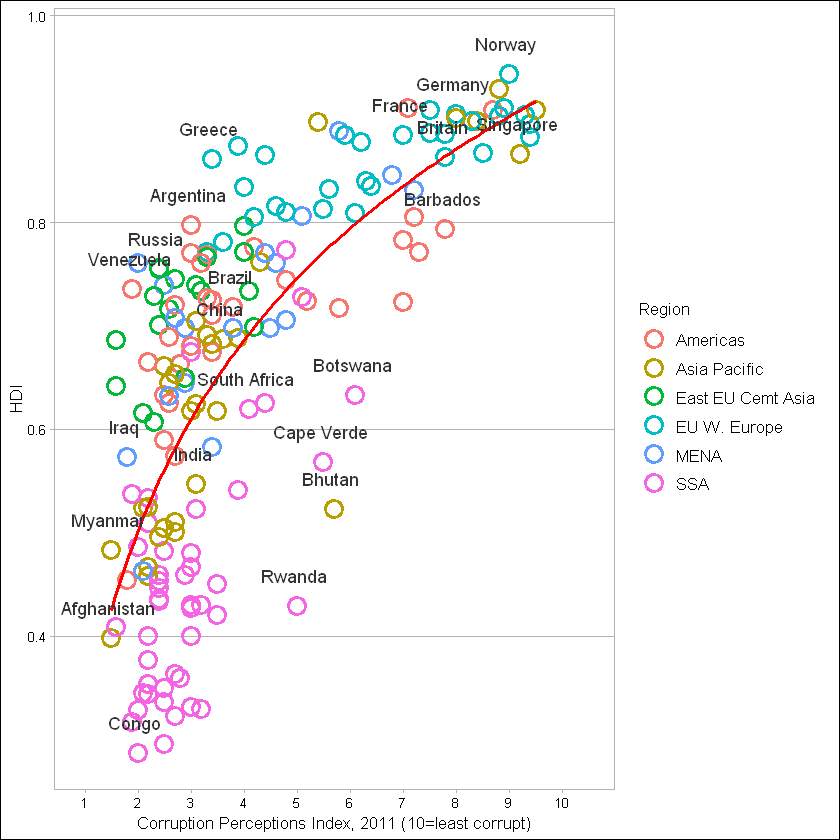

In [11]:
pl5 <- pl4 + scale_x_continuous(name = "Corruption Perceptions Index, 2011 (10=least corrupt)",
                     limits = c(.9, 10.5),breaks=1:10) 
pl5

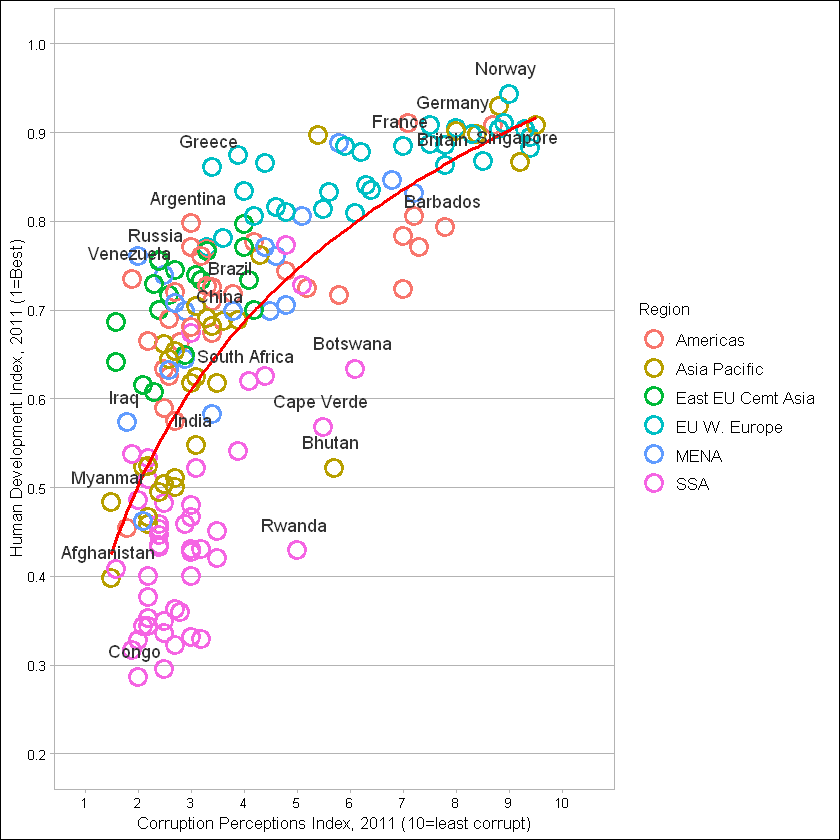

In [12]:
pl6 <- pl5 + scale_y_continuous(name = "Human Development Index, 2011 (1=Best)",
                     limits = c(0.2, 1.0), breaks=seq(0.2,1, by =0.1))
pl6

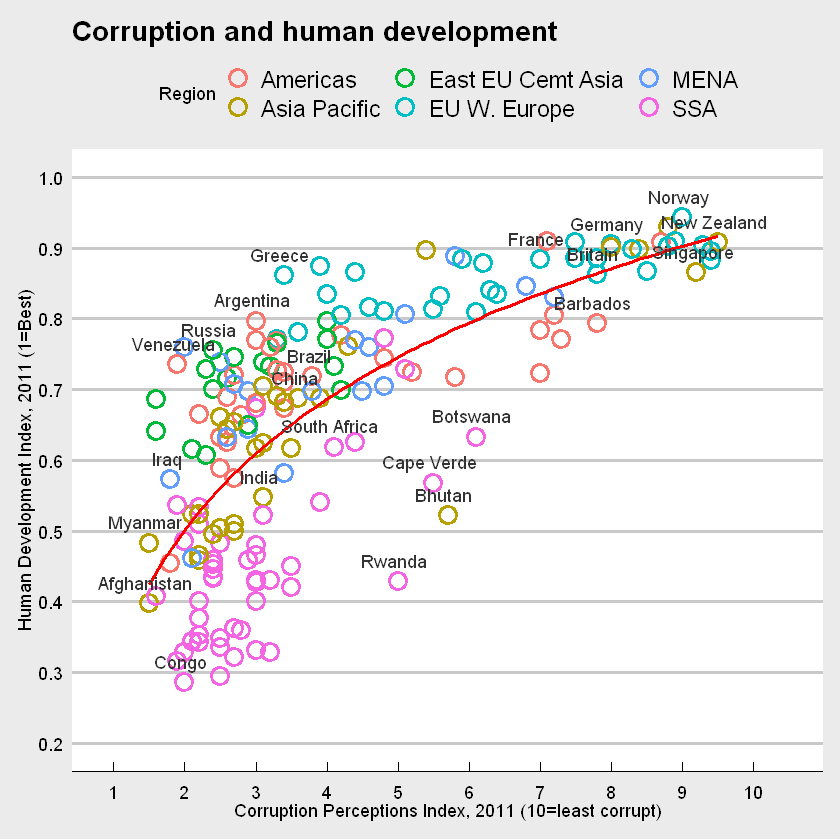

In [13]:
pl6 + ggtitle("Corruption and human development") +theme_economist_white()
